# BackPropagation

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4)

## XOR Dataset

In [8]:
X = np.array([[0,0,1,1],[0,1,0,1]]) # 2x4
y = np.array([[0,1,1,0]])           # 1x4

## Functions

In [9]:
def sigmoid(z):
    # IMPLEMENT HERE
    z = 1 / (1 + np.exp(-z))
    return z

def forward_prop(w1, w2, b1, b2, x):
    # IMPLEMENT HERE
    z1 = w1 @ x +b1
    h1 = sigmoid(z1)
    z2 = w2 @ h1 + b2
    y_hat = sigmoid(z2)
    return z1, h1, z2, y_hat

def back_prop(m,w1,w2,z1,h1,z2,y_hat,x,y):
    # IMPLEMENT HERE
    dz2 = y_hat - y
    dw2 = dz2 @ h1.T
    db2 = dz2 @ np.ones((m,1))
    dz1 = w2.T @ dz2 * h1 * (1-h1)
    dw1 = dz1 @ x.T
    db1 = dz1 @ np.ones((m,1))

    return dw1, db1, dw2, db2

## Define and Initialize weights

In [13]:
## Initialize weights
n_x = 2
n_y = 1
n_h = 2

w1= np.random.randn(n_h, n_x)
w2= np.random.randn(n_y, n_h)
b1= np.zeros((2, 1))
b2= np.zeros((1, 1))

## Learning

w1: [-6.93412839  6.66013086 -7.2530634   7.45532255]
w2: [ 13.27901714 -12.67140571]
b1: [-3.52349638  3.63606629]
b2: [5.99185222]
loss: 0.002643063119007881


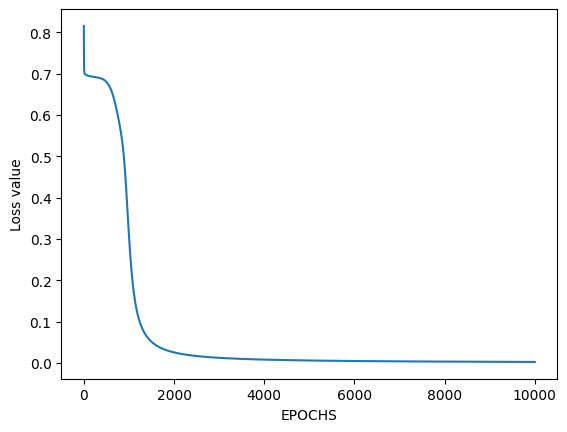

In [14]:
iterations = 10000
losses = []
m = y.shape[1]      # # of data set
lr = 0.1            # Learning rate
epsilon = 1e-8

for i in range(iterations):
    # IMPLEMENT HERE
    z1, a1, z2, y_hat = forward_prop(w1, w2, b1, b2, X)
    loss = -(1/m)*np.sum(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
    losses.append(loss)

    dw1, db1, dw2, db2 = back_prop(m,w1,w2,z1,a1,z2,y_hat,X,y)
    w2 = w2 - lr * dw2
    w1 = w1 - lr * dw1
    b2 = b2 - lr * db2
    b1 = b1 - lr * db1

print(f'w1: {w1.flatten()}')
print(f'w2: {w2.flatten()}')
print(f'b1: {b1.flatten()}')
print(f'b2: {b2.flatten()}')
print(f'loss: {losses[-1]}')

# plot losses to see how our network is doing
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

## Predict

In [15]:
## Predict
def predict(w1,w2, b1, b2, input):
    z1, a1, z2, a2 = forward_prop(w1, w2, b1, b2, input)
    a2 = np.squeeze(a2)

    if a2 <= 0.5:
        return 0
    else:
        return 1

for x in X.T:
    print(f'{x} => {predict(w1, w2, b1, b2, x.reshape(2,1))}')

[0 0] => 0
[0 1] => 1
[1 0] => 1
[1 1] => 0


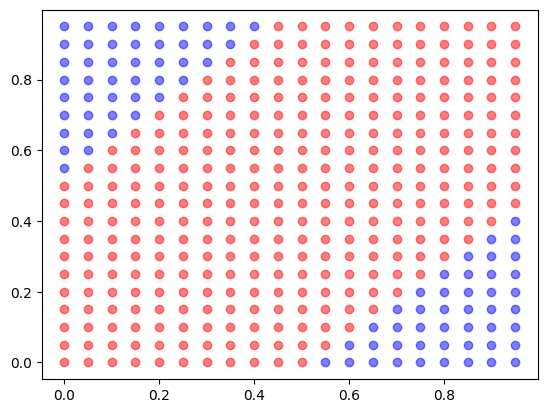

In [18]:
color = ['red', 'blue']
for x0 in np.arange(0, 1, 0.05):
    for x1 in np.arange(0, 1, 0.05):
        x = np.array([x0, x1])
        y_hat_cls = predict(w1, w2, b1, b2, x.reshape(2,1))
        plt.scatter(x0, x1, c=color[y_hat_cls], alpha=0.5)

plt.show()